<a href="https://colab.research.google.com/github/rmadrazo97/EITCA-AI-Academy/blob/main/ML1_Plain_and_simple_estimators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.15.0


In [29]:
!pip install tensorflow-datasets

In [37]:
import tensorflow_datasets as tfds

# Load the Iris dataset using TensorFlow Datasets.
# This function returns the dataset and its metadata.
iris, iris_info = tfds.load('iris', with_info=True, as_supervised=True)

# Access the 'train' split of the dataset.
# TensorFlow datasets are often split into 'train', 'test', etc.
train_dataset = iris['train']

# Shuffle and batch the training dataset.
# Shuffling randomizes the order of examples, which is important for training.
# Batching groups multiple examples into a single batch, which is important for training efficiency.
train_dataset = train_dataset.shuffle(150).batch(32)

# Prepare the test dataset.
# Here, we take a portion of the training dataset to use as our test dataset.
# We also batch it similarly to the training dataset.
# Note: In a real-world scenario, you would typically have a separate 'test' split.
test_dataset = iris['train'].batch(32).take(30)  # Adjust the test size as needed

In [38]:
import tensorflow as tf

# Define a simple Sequential neural network model
model = tf.keras.Sequential([
    # First Dense layer with 30 neurons and ReLU activation.
    # 'input_shape' is set to 4, as the Iris dataset has 4 feature columns.
    tf.keras.layers.Dense(30, activation='relu', input_shape=(4,)),

    # Second Dense layer with 10 neurons and ReLU activation.
    tf.keras.layers.Dense(10, activation='relu'),

    # Output Dense layer with 3 neurons (one for each class in the Iris dataset).
    # No activation function is specified here, as this will be a linear layer.
    tf.keras.layers.Dense(3)
])

# Compile the model
# 'adam' optimizer is used for gradient descent.
# 'SparseCategoricalCrossentropy' loss is used as this is a multi-class classification problem.
# 'accuracy' is used as a metric to monitor the performance of the model.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model on the training dataset.
# 'epochs' specifies how many times the entire dataset is passed through the network.
model.fit(train_dataset, epochs=20)  # Adjust the number of epochs as needed

Epoch 1/20
5/5 [==============================] - 1s 4ms/step - loss: 1.4662 - accuracy: 0.3333
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 1.3318 - accuracy: 0.3333
Epoch 3/20
5/5 [==============================] - 0s 6ms/step - loss: 1.2271 - accuracy: 0.3533
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 1.1155 - accuracy: 0.4267
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 1.0197 - accuracy: 0.4400
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.9448 - accuracy: 0.4733
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.8793 - accuracy: 0.5333
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 0.8254 - accuracy: 0.5733
Epoch 9/20
5/5 [==============================] - 0s 4ms/step - loss: 0.7726 - accuracy: 0.6933
Epoch 10/20
5/5 [==============================] - 0s 4ms/step - loss: 0.7281 - accuracy: 0.9200
Epoch 11/20
5/5 [======================

In [39]:
# Evaluate the model's performance on the test dataset.
# This will provide the loss value and accuracy of the model on the test data.
test_loss, test_accuracy = model.evaluate(test_dataset)
print('\nTest accuracy:', test_accuracy)

5/5 [==============================] - 0s 3ms/step - loss: 0.4475 - accuracy: 0.9667

Test accuracy: 0.9666666388511658


In [41]:
# Save the entire model in the Keras format
model.save('my_iris_model.keras')

Here's how you can modify the existing model structure to create a deeper neural network:

1. Increase the Number of Layers and Neurons
The key to transforming your model into a DNN is adding more Dense layers with a higher number of neurons. You might also experiment with different activation functions like relu, which is a common choice for hidden layers.

2. Adjust the Learning Rate
With a deeper network, it might be beneficial to adjust the learning rate of the optimizer. A lower learning rate can help in stabilizing the training process.

3. Experiment with Regularization
To prevent overfitting, especially in a deeper network, you can use techniques like dropout or L2 regularization.



In [42]:
# Define a deeper Sequential model
def create_deep_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),  # First hidden layer with 64 neurons
        tf.keras.layers.Dense(64, activation='relu'),                    # Second hidden layer with 64 neurons
        tf.keras.layers.Dropout(0.5),                                    # Dropout layer for regularization
        tf.keras.layers.Dense(32, activation='relu'),                    # Third hidden layer with 32 neurons
        tf.keras.layers.Dense(3)                                         # Output layer with 3 neurons (one per class)
    ])

    return model

deep_model = create_deep_model()

# Compile the deep model
deep_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjust learning rate as needed
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

# Train the deep model
deep_model.fit(train_dataset, epochs=30)  # Adjust the number of epochs as needed


Epoch 1/30
5/5 [==============================] - 1s 5ms/step - loss: 1.2124 - accuracy: 0.3800
Epoch 2/30
5/5 [==============================] - 0s 4ms/step - loss: 1.0908 - accuracy: 0.4000
Epoch 3/30
5/5 [==============================] - 0s 4ms/step - loss: 1.0390 - accuracy: 0.4600
Epoch 4/30
5/5 [==============================] - 0s 4ms/step - loss: 0.9816 - accuracy: 0.4667
Epoch 5/30
5/5 [==============================] - 0s 5ms/step - loss: 0.9688 - accuracy: 0.4867
Epoch 6/30
5/5 [==============================] - 0s 4ms/step - loss: 0.8586 - accuracy: 0.6133
Epoch 7/30
5/5 [==============================] - 0s 4ms/step - loss: 0.8084 - accuracy: 0.6467
Epoch 8/30
5/5 [==============================] - 0s 4ms/step - loss: 0.7528 - accuracy: 0.7000
Epoch 9/30
5/5 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.7200
Epoch 10/30
5/5 [==============================] - 0s 4ms/step - loss: 0.6385 - accuracy: 0.7733
Epoch 11/30
5/5 [======================

In [43]:
# Evaluate the deep model on the test dataset
test_loss, test_accuracy = deep_model.evaluate(test_dataset)

# Print the results
print('\nTest Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 0.1758 - accuracy: 0.9867

Test Loss: 0.17584335803985596
Test Accuracy: 0.9866666793823242


**Interpretation**
**Test Loss:** This value represents how well the model is doing in terms of the loss function (Sparse Categorical Crossentropy in this case) on the test data. A lower loss indicates better performance.

**Test Accuracy:** This is the proportion of correct predictions in the test set. Higher accuracy means the model is predicting more correct outcomes.
Considerations

If your model shows high accuracy on the training data but low accuracy on the test data, it might be overfitting. Overfitting occurs when a model learns the training data too well, including its noise and outliers, rather than generalizing from the patterns.

Regularization techniques (like dropout), adjusting the model architecture, or collecting more data can help mitigate overfitting.
On the other hand, if the model performs poorly on both training and test data, it might be underfitting. This could be due to an overly simple model, insufficient training, or issues with the data quality.


In [44]:
!pip install pydot graphviz

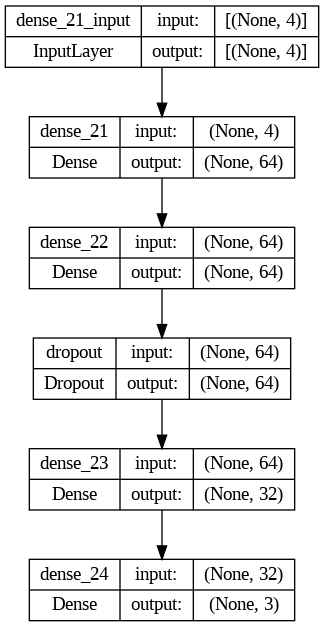

In [45]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(deep_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
